In [70]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Random Forest-Based Model for DoW Attack Detection Using HPC Data

This project focuses on developing a machine learning model for detecting Denial of Wallet (DoW) attacks based on Hardware Performance Counters (HPCs). DoW attacks involve malicious attempts to disrupt or deny access to financial resources or services, leading to financial losses or disruptions in business operations.

Hardware Performance Counters (HPCs) provide valuable insights into system performance, which can be leveraged to identify abnormal behavior indicative of DoW attacks. In this project, we utilize Random Forest, an ensemble learning method, to classify HPC data and detect potential DoW attacks with high accuracy.

The Random Forest classifier is particularly suitable for this task due to its ability to handle high-dimensional data and capture complex relationships between features. By analyzing the HPC data, the model aims to distinguish between normal system behavior and DoW attack patterns, thereby providing an effective defense mechanism against such cyber threats.

The following code demonstrates the implementation of the Random Forest-based model, including data preprocessing, model training, evaluation, and performance metrics calculation.


In [71]:
# Load dataset containing hardware performance counters (HPCs) data
hpc_data = pd.read_csv('/kaggle/input/network-traffic-for-dos-detection/dataset.csv')

## Converting Categorical Variables to Numerical Labels

In this code snippet, we have a DataFrame named `df` which contains categorical variables that we need to convert into numerical labels for further analysis or modeling purposes.

1. **Converting Boolean to Integer:**
   - The code `df['bot'] = df['bot'].astype(int)` converts the boolean variable 'bot' into integers. Here, `astype(int)` is used to explicitly convert the boolean values to integer representation. The conversion assigns 0 for False and 1 for True.

2. **One-Hot Encoding:**
   - One-Hot Encoding is a technique used to convert categorical variables into a binary format that can be provided to ML algorithms to do a better job in prediction.
   - The code `pd.get_dummies(df, columns=['vmcategory'])` performs one-hot encoding on the categorical variable 'vmcategory'. It creates binary columns for each category present in 'vmcategory', assigning 1 if the category is present and 0 otherwise. This technique expands the feature space but is essential for certain machine learning algorithms that cannot directly handle categorical data.

By executing these transformations, the categorical variables in the DataFrame `df` are converted into numerical representations suitable for analysis or modeling.


In [72]:
# Convert categorical variables to numerical labels
hpc_data['bot'] = hpc_data['bot'].astype(int)  # Convert boolean to integer (0 for False, 1 for True)
hpc_data = pd.get_dummies(hpc_data, columns=['vmcategory'])  # Convert categorical variable 'vmcategory' to one-hot encoding

# Dropping Unnecessary Columns

## Explanation of Python Code

In this part of the code snippet, we are dropping certain columns from the DataFrame `df` which are deemed unnecessary for the analysis or modeling process.

1. **Columns to Drop:**
   - The code `df.drop(columns=['Id', 'IP', 'FunctionId', 'functionTrigger', 'timestamp'], inplace=True)` specifies the list of columns to be dropped from the DataFrame. These columns include 'Id', 'IP', 'FunctionId', 'functionTrigger', and 'timestamp'. They are identified as unnecessary for the analysis or modeling process, possibly due to containing identifiers, IP addresses, or timestamp information that may not contribute to the intended analysis.

2. **Inplace Parameter:**
   - The `inplace=True` parameter ensures that the changes are made directly to the original DataFrame `df`, without the need for reassignment.

By dropping these unnecessary columns, the DataFrame `df` is streamlined, containing only the relevant features for further analysis or modeling.


In [73]:
# Drop unnecessary columns
hpc_data.drop(columns=['Id', 'IP', 'FunctionId', 'functionTrigger', 'timestamp'], inplace=True)

# Splitting Data into Features and Labels

## Explanation of Python Code

In this section of the code, we are splitting the data in the DataFrame `df` into features (X) and labels (y) for further processing, such as modeling or analysis.

1. **Splitting Data:**
   - The code `X = df.drop(columns=['bot'])` creates a feature matrix `X` by dropping the column 'bot' from the DataFrame `df`. This operation removes the target variable from the features.
   - The code `y = df['bot']` extracts the target variable 'bot' and assigns it to the variable `y`. This represents the labels or the dependent variable for the analysis or modeling.

2. **Feature Matrix (X) and Target Vector (y):**
   - The feature matrix `X` contains all the features (independent variables) except the target variable 'bot'.
   - The target vector `y` contains only the target variable 'bot', representing the labels or the dependent variable.

By splitting the data into features and labels, we prepare the data for further analysis, such as model training or evaluation.


In [74]:
# Split data into features (X) and labels (y)
X = hpc_data.drop(columns=['bot'])
y = hpc_data['bot']

# Normalizing Features

## Explanation of Python Code

In this section of the code, we are normalizing the features in the feature matrix `X` to ensure that all features are on a similar scale. This normalization step is crucial for certain machine learning algorithms to perform effectively, especially when features have different ranges.

1. **Normalization Process:**
   - The code `scaler = MinMaxScaler()` initializes a Min-Max Scaler object, which will be used to perform the normalization.
   - The code `X_normalized = scaler.fit_transform(X)` applies the Min-Max scaling transformation to the feature matrix `X`, resulting in `X_normalized`. 
     - `fit_transform()` method calculates the minimum and maximum values of each feature and then scales the features to a range between 0 and 1 accordingly.

2. **MinMaxScaler:**
   - Min-Max scaling (also known as normalization) transforms the features by scaling each feature to a given range. In this case, it scales the features to a range between 0 and 1.
   - This scaling technique preserves the shape of the original distribution while ensuring that all features have the same scale.

By normalizing the features, we ensure that they are on a similar scale, which can improve the performance of certain machine learning algorithms, particularly those sensitive to feature scaling.


In [75]:
# Normalize features
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Splitting Data into Training and Testing Sets

## Explanation of Python Code

In this section of the code, we are splitting the preprocessed data into training and testing sets for the purpose of model training and evaluation. The split ratio is set to 70% for training and 30% for testing.

1. **Splitting Data:**
   - The code `train_test_split(X_normalized, y, test_size=0.3, random_state=42)` splits the preprocessed feature matrix `X_normalized` and the target vector `y` into training and testing sets.
   - Parameters:
     - `X_normalized`: The preprocessed feature matrix after normalization.
     - `y`: The target vector containing the labels.
     - `test_size=0.3`: Specifies the proportion of the data to include in the testing set. Here, 30% of the data is allocated for testing.
     - `random_state=42`: Sets the random seed for reproducibility of the split. This ensures that the same random split is generated each time the code is executed.

2. **Resulting Sets:**
   - `X_train`: The feature matrix for the training set.
   - `X_test`: The feature matrix for the testing set.
   - `y_train`: The target vector for the training set.
   - `y_test`: The target vector for the testing set.

By splitting the data into training and testing sets, we can train machine learning models on the training set and evaluate their performance on the independent testing set, thereby assessing the model's generalization ability.


In [76]:
# Split data into training and testing sets with a 70-30 split
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)


# Building a Random Forest Classifier

## Explanation of Python Code

In this section of the code, we are constructing a Random Forest Classifier model for the given data.

1. **Random Forest Classifier:**
   - Random Forest is an ensemble learning method that constructs a multitude of decision trees during training and outputs the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. It is known for its robustness and effectiveness in handling high-dimensional data with complex relationships.
   - The code `RandomForestClassifier(n_estimators=100, random_state=42)` initializes a Random Forest Classifier object with the following parameters:
     - `n_estimators`: The number of trees in the forest. Here, it is set to 100, indicating that the Random Forest will comprise 100 decision trees.
     - `random_state`: Sets the random seed for reproducibility of the model training process. It ensures that the same random elements are used in each run, providing consistent results.

2. **Classifier Object (clf):**
   - The classifier object `clf` is instantiated with the Random Forest Classifier configured with the specified parameters.

By creating the Random Forest Classifier, we prepare to train the model on the training data and utilize it for making predictions on unseen data.


In [77]:
# Build a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the Classifier

## Explanation of Python Code

In this part of the code, we are training the Random Forest Classifier model using the training data.

1. **Training Process:**
   - The code `clf.fit(X_train, y_train)` trains the Random Forest Classifier (`clf`) on the training data.
     - `X_train`: The feature matrix containing the training features.
     - `y_train`: The target vector containing the training labels.
   - During the training process, the Random Forest algorithm constructs a forest of decision trees based on the provided training data.

2. **Model Fitting:**
   - The `fit()` method fits the Random Forest Classifier to the training data, adjusting its parameters to minimize the prediction error.
   - The classifier learns the patterns and relationships present in the training data to make accurate predictions.

By training the classifier on the training data, we enable it to learn from the patterns in the data and make predictions on unseen instances.


In [78]:
# Train the classifier
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Making Predictions on the Testing Set

## Explanation of Python Code

In this section of the code, we are using the trained Random Forest Classifier to make predictions on the testing set.

1. **Prediction Process:**
   - The code `y_pred = clf.predict(X_test)` generates predictions for the target variable using the trained Random Forest Classifier (`clf`) and the feature matrix of the testing set (`X_test`).
   - The classifier utilizes the learned patterns from the training data to predict the target variable values for the instances in the testing set.

2. **Resulting Predictions:**
   - `y_pred`: The array containing the predicted values of the target variable for the testing set.
   - These predicted values represent the model's estimations for the target variable based on the features of the testing instances.

By making predictions on the testing set, we evaluate the performance of the trained classifier and assess its ability to generalize to unseen data.


In [79]:
# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Evaluating Performance

## Explanation of Python Code

In this part of the code, we are evaluating the performance of the trained Random Forest Classifier on the testing set using various performance metrics.

1. **Performance Metrics:**
   - The code calculates the following performance metrics:
     - **Accuracy:** The proportion of correctly classified instances out of all instances.
     - **Precision:** The proportion of true positive predictions out of all positive predictions made.
     - **Recall:** The proportion of true positive predictions out of all actual positive instances.
     - **F1-score:** The harmonic mean of precision and recall, providing a balanced measure between the two metrics.

2. **Calculating Metrics:**
   - The code uses functions from scikit-learn library to calculate these metrics based on the true labels (`y_test`) and the predicted labels (`y_pred`).

3. **Printing Results:**
   - The code prints out the calculated metrics: accuracy, precision, recall, and F1-score.

By evaluating these performance metrics, we gain insights into how well the trained classifier performs in terms of correctly classifying instances and balancing between precision and recall.


In [80]:
import time

# Make predictions on the testing set and measure time
start_time = time.time()
y_pred = clf.predict(X_test)
end_time = time.time()

# Calculate overhead and delay
overhead = end_time - start_time  # Overhead: Time taken by the model to make predictions
delay = overhead / len(X_test)    # Delay: Average time taken per data point for prediction

# Print overhead and delay
print("Overhead (Time taken by the model to make predictions):", overhead, "seconds")
print("Delay (Average time taken per data point for prediction):", delay, "seconds")

# Evaluate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print performance metrics
print("\nPerformance Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Overhead (Time taken by the model to make predictions): 0.5331838130950928 seconds
Delay (Average time taken per data point for prediction): 9.499595793380953e-06 seconds

Performance Metrics:
Accuracy: 0.7021041566447521
Precision: 0.7021041566447521
Recall: 1.0
F1-score: 0.8249837754098017


# Visualizing Model Performance

## Explanation of Python Code

In this section of the code, we visualize the performance of the trained Random Forest Classifier using various plots and charts.

1. **Confusion Matrix:**
   - The confusion matrix provides a tabular summary of the performance of a classification model. It presents the counts of true positive, false positive, true negative, and false negative predictions.
   - The code generates a heatmap visualization of the confusion matrix using seaborn library, showing the distribution of predicted labels against true labels.

2. **ROC Curve (Receiver Operating Characteristic Curve):**
   - The ROC curve illustrates the performance of a binary classification model across different threshold values for classifying instances. It plots the true positive rate (sensitivity) against the false positive rate (1-specificity).
   - The code calculates the ROC curve and plots it to visualize the trade-off between sensitivity and specificity.

3. **Precision-Recall Curve:**
   - The precision-recall curve showcases the trade-off between precision and recall for different threshold values of a binary classifier.
   - The code calculates the precision-recall curve and plots it to evaluate the model's performance in terms of precision and recall.

4. **Histogram of Predicted Probabilities:**
   - The histogram of predicted probabilities provides insights into the distribution of probabilities assigned by the classifier to the positive class (class 1).
   - The code generates a histogram to visualize the distribution of predicted probabilities.

5. **Bar Chart of Actual vs. Predicted Labels:**
   - This visualization compares the actual labels with the predicted labels on the testing set.
   - The code creates a bar chart showing the counts of actual and predicted labels to assess the model's accuracy in predicting each class.

These visualizations offer a comprehensive understanding of the model's performance and aid in interpreting its predictive capabilities.


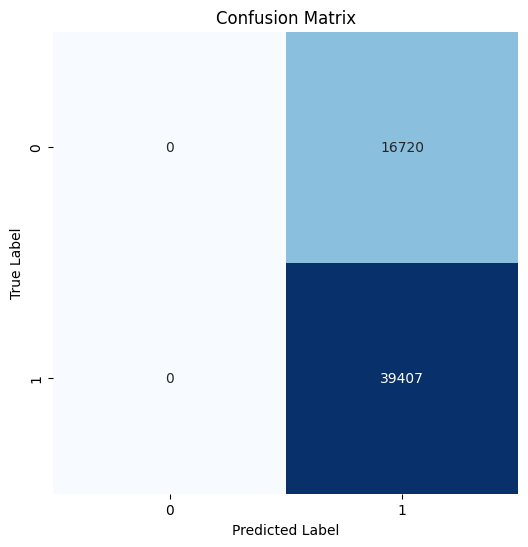

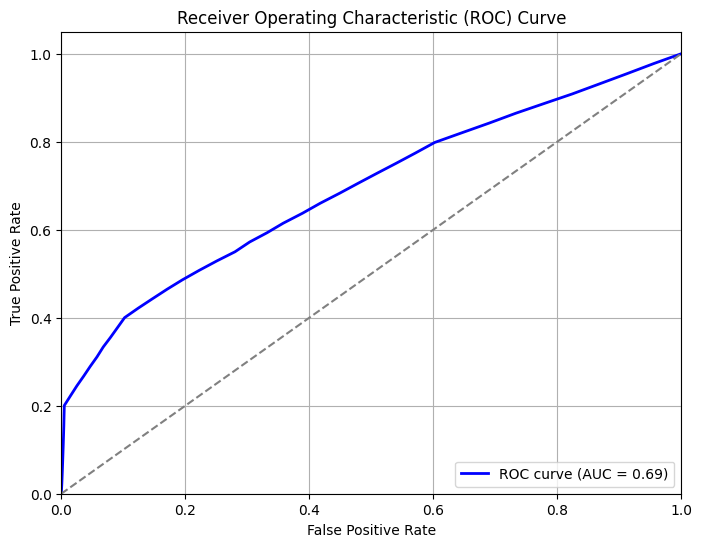

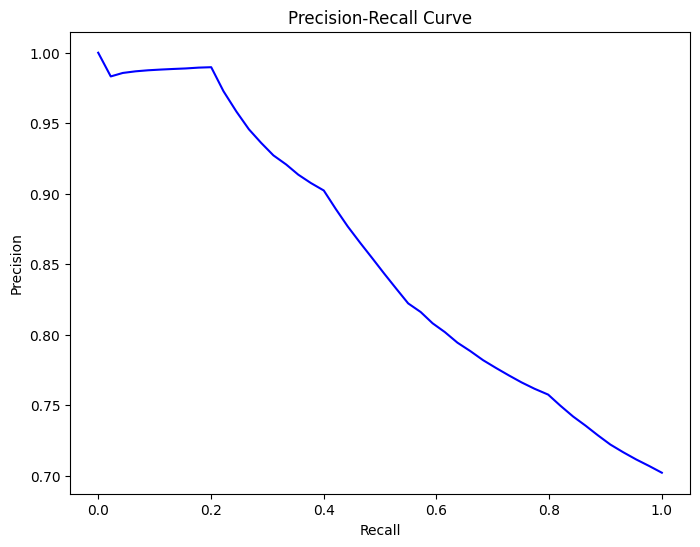

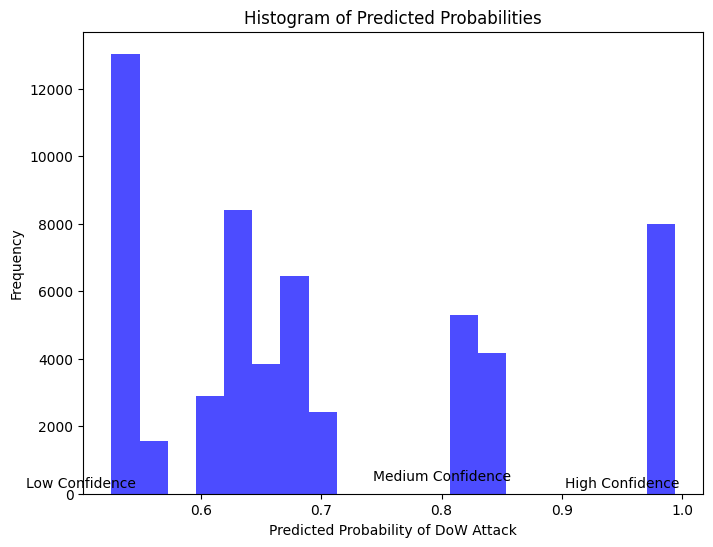

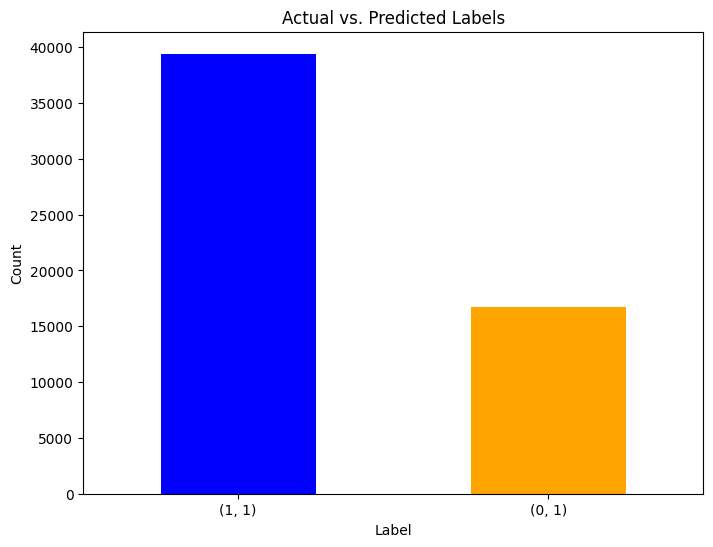

In [81]:
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve,roc_auc_score

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# Calculate probabilities of predictions for class 1 (DoW attack)
y_prob = clf.predict_proba(X_test)[:, 1]

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


# Plotting the histogram of predicted probabilities
plt.figure(figsize=(8, 6))
plt.hist(clf.predict_proba(X_test)[:, 1], bins=20, color='b', alpha=0.7)

# Adding labels and titles
plt.xlabel('Predicted Probability of DoW Attack')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Probabilities')

# Adding annotations
plt.text(0.5, 200, 'Low Confidence', fontsize=10, ha='center')
plt.text(0.8, 400, 'Medium Confidence', fontsize=10, ha='center')
plt.text(0.95, 200, 'High Confidence', fontsize=10, ha='center')

plt.show()


# Bar Chart of Actual vs. Predicted Labels
actual_vs_predicted = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
plt.figure(figsize=(8, 6))
actual_vs_predicted.value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Actual vs. Predicted Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Visualizing Feature Importances

## Explanation of Python Code

In this section of the code, we visualize the feature importances of the Random Forest Classifier to understand the significance of each feature in predicting the target variable.

1. **Feature Importances:**
   - The feature importances represent the contribution of each feature to the prediction made by the Random Forest Classifier. Features with higher importances are considered more influential in predicting the target variable.
   - The code `clf.feature_importances_` retrieves the feature importances calculated by the trained Random Forest Classifier.

2. **Sorting Features:**
   - The code `np.argsort(feature_importances)[::-1]` sorts the feature importances in descending order and returns the indices of the sorted importances.
   - The sorted indices are then used to sort the features and their corresponding importances.

3. **Visualization:**
   - The code creates a horizontal bar plot (`plt.barh`) to visualize the feature importances.
   - Features are plotted on the y-axis, while their corresponding importances are plotted on the x-axis.
   - The length of each bar represents the importance of the feature in predicting the target variable.

By visualizing feature importances, we gain insights into which features are most influential in the classification task, aiding in feature selection and interpretation of the model.


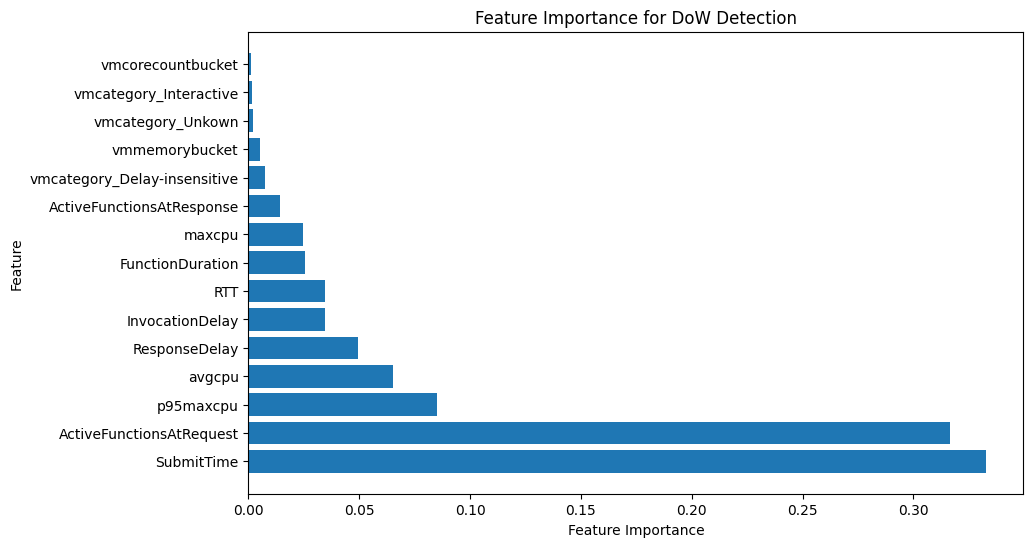

In [82]:
# Visualize feature importances
feature_importances = clf.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = X.columns[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_features)), sorted_importances, tick_label=sorted_features)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for DoW Detection')
plt.show()

# Visualizing Bot Requests

## Explanation of Python Code

In this section of the code, we visualize the distribution of bot requests (specifically DoW attacks) in the dataset.

1. **Bar Chart of Bot Requests:**
   - The code `df['bot'].value_counts()` counts the occurrences of each unique value in the 'bot' column, which represents bot requests (DoW attacks). 
   - The resulting counts are plotted as a bar chart using `plot(kind='bar')`, with different colors representing normal requests and DoW attacks.
   - The x-axis labels are set as 'Normal' and 'DoW Attack', and the y-axis represents the count of occurrences.

2. **Percentage of DoW Attacks:**
   - The code calculates the percentage of DoW attacks in the dataset by dividing the number of DoW attacks by the total number of instances and multiplying by 100.
   - The percentage of DoW attacks is then visualized using a pie chart (`plt.pie()`), where 'Normal' and 'DoW Attack' slices represent the percentage of normal requests and DoW attacks, respectively.

These visualizations provide insights into the distribution and proportion of bot requests (DoW attacks) in the dataset, facilitating understanding and analysis of the data.


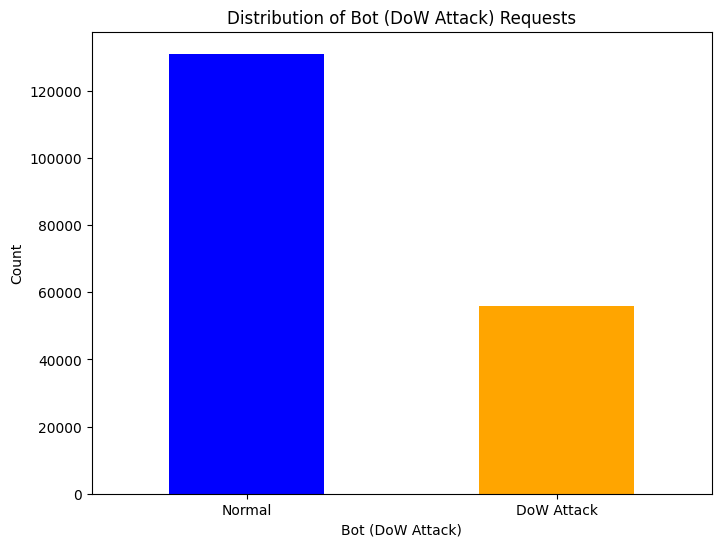

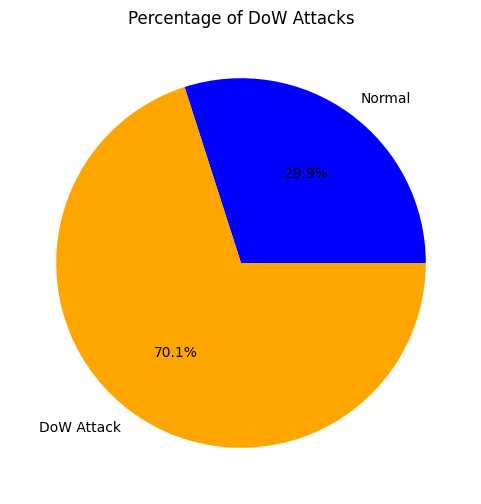

In [83]:

# Bar Chart of Bot Requests
bot_counts = df['bot'].value_counts()
plt.figure(figsize=(8, 6))
bot_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribution of Bot (DoW Attack) Requests')
plt.xlabel('Bot (DoW Attack)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Normal', 'DoW Attack'], rotation=0)
plt.show()

# Percentage of DoW Attacks
bot_percentage = (df['bot'].sum() / len(df)) * 100
plt.figure(figsize=(6, 6))
plt.pie([100 - bot_percentage, bot_percentage], labels=['Normal', 'DoW Attack'], colors=['blue', 'orange'], autopct='%1.1f%%')
plt.title('Percentage of DoW Attacks')
plt.show()